<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Identification of major customer segments on a transactional dataset. </u></b>



## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description:** Product (item) name. Nominal.
- **Quantity:** The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country:** Country name. Nominal, the name of the country where each customer resides.

## **Data Preperation**

In [2]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
retail_df= pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Projects/Online Retail Customer Segmentation - Abhishek Shubham/Online Retail.xlsx') 

In [5]:
#Checking the top 5 rows
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#Checking the bottom 5 rows
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
#Basic info of the dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Shape of the dataset
retail_df.shape

(541909, 8)

In [9]:
#Getting all the null values and their percentage
null_values= retail_df.isnull().sum().sort_values(ascending= False)
total= len(retail_df)
percentage_null_values= (null_values/total )* 100
null_df= pd.concat([null_values, percentage_null_values], axis= 1, keys= ['Total Null Values', 'Percentage %'])
null_df

,Total Null Values,Percentage %
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


- Only 2 columns has missing values i.e. 'CustomerID' and 'Description'.
- Around 25% missing values are there in **CustomerID** and 0.26% null values present in **Description** column.
- These are such features that we cannot impute with other values because customer IDs are unique for each customer, so we have to drop these instances.

In [10]:
retail_df.shape

(541909, 8)

In [11]:
#Dropping rows with null values
retail_df.dropna(inplace= True)

In [12]:
retail_df.shape

(406829, 8)

In [13]:
#Number of duplicate values
print(len(retail_df[retail_df.duplicated()]))

5225


In [14]:
# Dropping duplicate rows
retail_df.drop_duplicates(inplace=True)

In [15]:
#New shape of DataFrame
retail_df.shape

(401604, 8)

Now we are left with 401604 instances/rows in our dataset after dropping Null and duplicate values.

In [16]:
#Descriptive statistics
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


From the above descriptive statistics we can say that customers usually buy **5** quantity of products per order. Also the median price that the company get paid by the customer for one unit is about **1.95.**

##**Feature Engineering**

In [17]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
#Creating a new feature Total amount
retail_df['total_amount']= retail_df['Quantity']* retail_df['UnitPrice']

In [19]:
#Extracting year, month, day and hours data from InvoiceDate column and creating a seperate column for these features.

retail_df['Invoice_year']= retail_df['InvoiceDate'].apply(lambda x: x.year )
retail_df['Invoice_month']= retail_df['InvoiceDate'].apply(lambda x: x.strftime('%B'))
retail_df['Invoice_day']= retail_df['InvoiceDate'].apply(lambda x: x.strftime('%A'))
retail_df['Invoice_hour']= retail_df['InvoiceDate'].apply(lambda x: x.hour)

In [20]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8


In feature engineering we have created total 5 new featues i.e. **total_amount, Invoice_year, Invoice_month, Invoice_day, Invoice_hour** from the existing features.

##**Exploratory Data Analysis**

In [21]:
#Selecting list of numerical features from the datatset
Numerical_features = list(retail_df.select_dtypes(['int64', 'float64']))
Numerical_features


['Quantity',
 'UnitPrice',
 'CustomerID',
 'total_amount',
 'Invoice_year',
 'Invoice_hour']

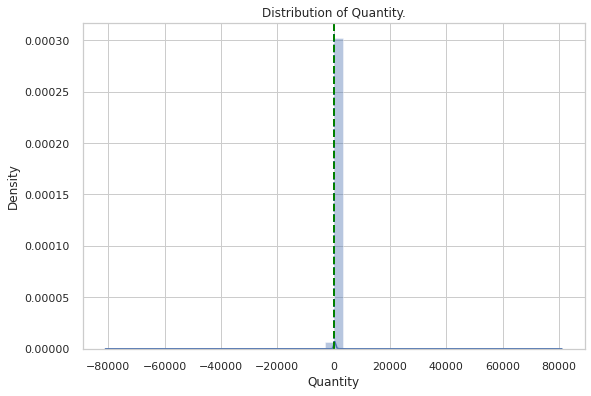

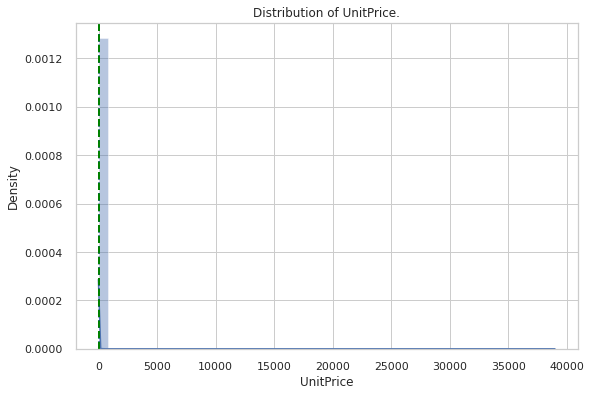

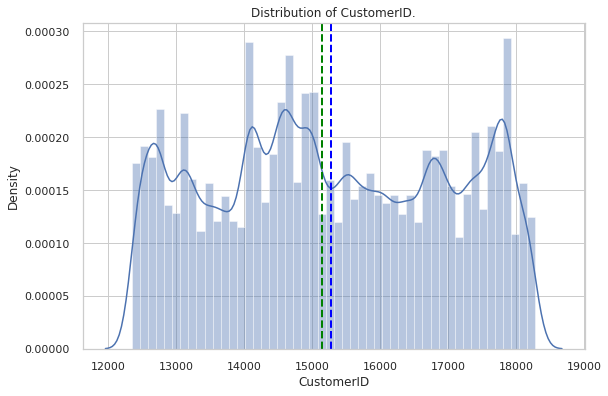

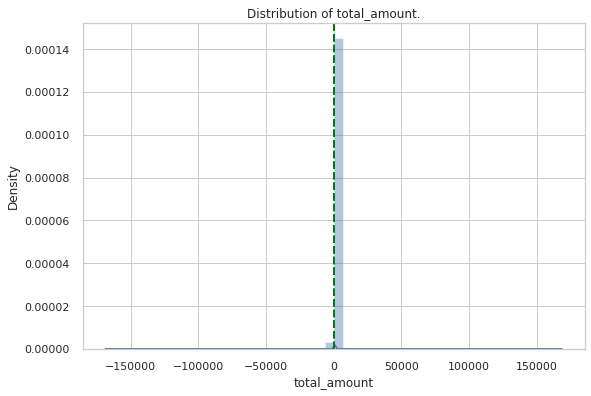

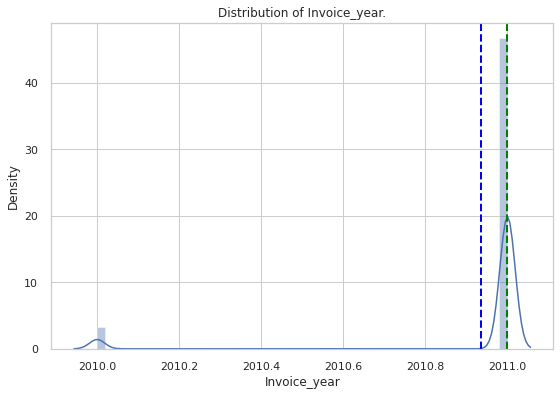

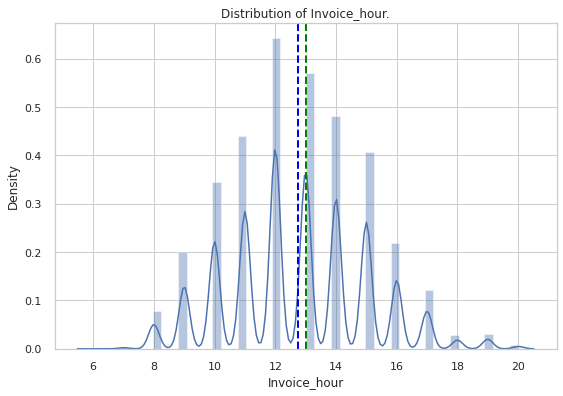

In [22]:
#Visualizing the distribution of all numerical features
sns.set(style='whitegrid')
for col in Numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = (retail_df[col])
  sns.distplot(retail_df[col],ax = ax)
  ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
  ax.set_title(f'Distribution of {col}.')
  plt.show()

In [23]:
# No of cancelled order
retail_df[retail_df['total_amount']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,December,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,December,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,December,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,December,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,December,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011,December,Friday,9
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011,December,Friday,10
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011,December,Friday,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011,December,Friday,11


It can be seen that there are total 8912 cancelled orders in our dataset.

In [24]:
#Defining function to create a row with cancelled orders
def order_status(data):
  '''
  This function will identify the executed and cancelled orders made by customers,
  those whom order is successfully executed, tagged as Successfull Orders
  those who cancel their orders, tag them with Cancelled Orders
  '''
  if(data < 0):
    return 'Cancelled Order'
  else:
    return 'Successful Order'
  return data

In [25]:
#Creating a copy of our orignal dataframe
retail_dup_data = retail_df.copy()

In [26]:
# applying business insight function on Total_Amount
retail_dup_data['Order_Status'] = retail_dup_data['total_amount'].apply(order_status)

In [27]:
retail_dup_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour,Order_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8,Successful Order
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Successful Order
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8,Successful Order
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Successful Order
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Successful Order


In [28]:
#Fetching the count of cancelled VS successful Order
Order_Status= retail_dup_data['Order_Status'].value_counts().reset_index()
Order_Status.rename(columns= {'index': 'Order_Status', 'Order_Status': 'Frequency'}, inplace= True)
Order_Status

,Order_Status,Frequency
0,Successful Order,392732
1,Cancelled Order,8872


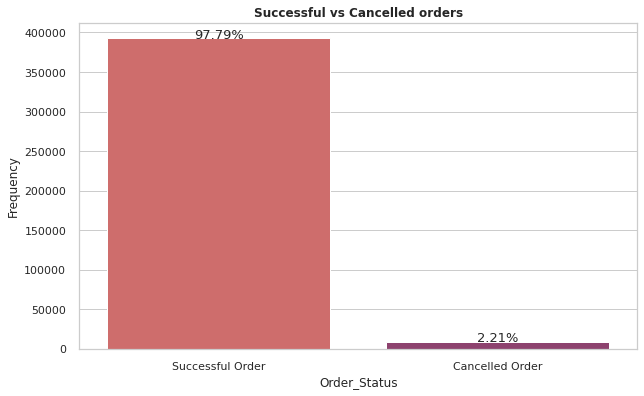

In [29]:
#Visualizing Status of the orders placed by customer
fig, ax = plt.subplots(figsize = (10,6))
splot= sns.barplot(x= 'Order_Status', y= 'Frequency', data= Order_Status, palette= 'flare')
ax.set_title('Successful vs Cancelled orders', weight= 'bold')

for p in splot.patches:                               
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+100, '{:1.2f}''%'.format(height/retail_dup_data.shape[0]*100),ha = "center", SIZE = 13)

Out of all the customers, 2.21% customers had cancelled their orders. So, In order to grow our business we need keep an eye on these customers. 

But there is an positive insight too there are 97.79% customers whose orders were successful which is good for our business.

In [30]:
# Count of unique values in hour column
retail_df.Invoice_hour.value_counts()

12    72213
13    64051
14    54194
11    49525
15    45641
10    38725
16    24618
9     22446
17    13604
8      8789
19     3423
18     3104
20      847
7       383
6        41
Name: Invoice_hour, dtype: int64

Text(0.5, 1.0, 'Number of orders placed per hour')

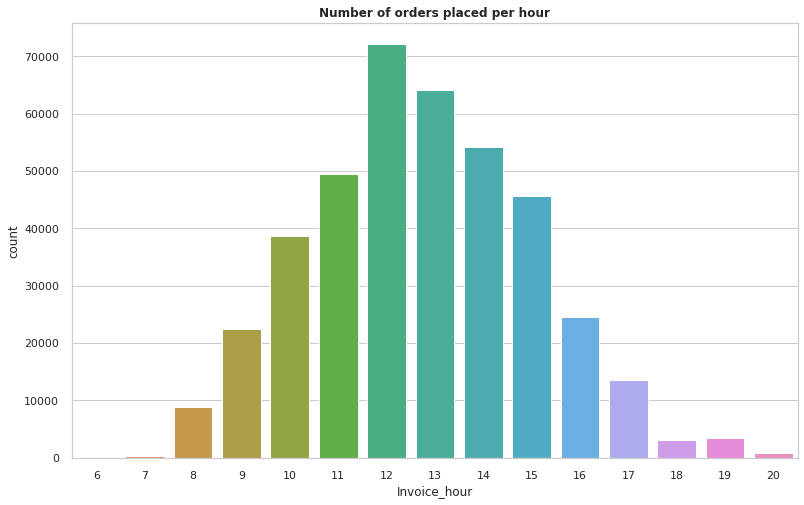

In [31]:
#Visualizing Invoice_hour column
plt.figure(figsize= (13, 8))
sns.countplot(x= 'Invoice_hour', data= retail_df)
plt.title('Number of orders placed per hour', weight= 'bold')

**Findings:**

* Most of the purchases by the customers are made between 10 AM to 3 PM. 

* There are very few purchases made in early morning and at midnight.

In [32]:
#Fetching the count of orders placed in each days
top_days= retail_df.Invoice_day.value_counts().reset_index()
top_days.rename(columns= {'index': 'Day', 'Invoice_day':'No_of_orders'}, inplace= True)
top_days['Orders_%']= top_days['No_of_orders']/ retail_df['Invoice_day'].count()*100
top_days

,Day,No_of_orders,Orders_%
0,Thursday,81575,20.312298
1,Wednesday,69753,17.368602
2,Tuesday,67376,16.776725
3,Monday,65715,16.363134
4,Sunday,61673,15.356670
5,Friday,55512,13.822571


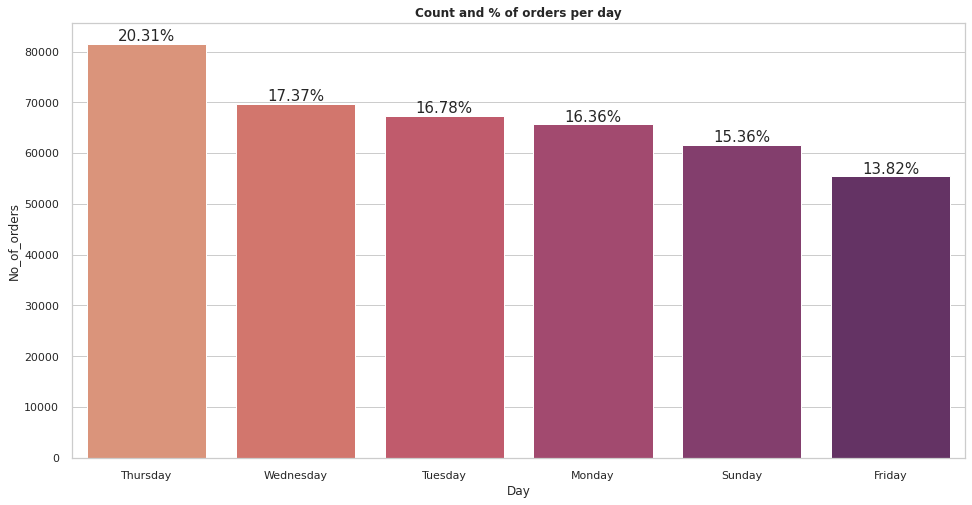

In [33]:
#Visualizing the count and % of Orders per day
fig, ax = plt.subplots(figsize = (16,8))
splot= sns.barplot(x= 'Day',y='No_of_orders', data= top_days, palette= 'flare')
ax.set_title('Count and % of orders per day', weight= 'bold')
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/retail_df.shape[0]*100),ha = "center", SIZE = 15)

**Findings:**

- It can be seen that **Thursday** is most popular day for our customers to place the orders, followed by **Wednesday**, **Tuesday** etc.
- Also it is noticeable that no orders are placed on **Saturday**. It's possible that the business takes a off on this day of the week.

In [34]:
#Count and percentage of orders made per month
top_months= retail_df.Invoice_month.value_counts().reset_index()
top_months.rename(columns= {'index': 'Month', 'Invoice_month': 'Count_of_orders'}, inplace= True)
top_months['%_of_orders']= top_months['Count_of_orders']/ retail_df['Invoice_month'].count()*100
top_months.head()

,Month,Count_of_orders,%_of_orders
0,November,64232,15.993865
1,October,49928,12.432147
2,December,43736,10.890330
3,September,40459,10.074352
4,May,28661,7.136632


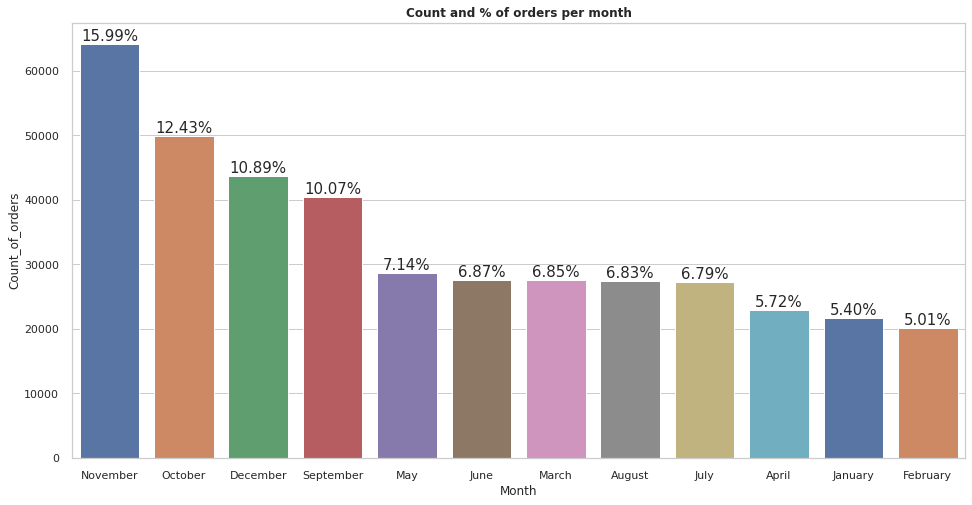

In [35]:
#Visualizing the count and % of Orders per month
fig, ax = plt.subplots(figsize = (16,8))
# plt.figure(figsize= (13, 8)) 
splot= sns.barplot(x= 'Month',y='Count_of_orders', data= top_months, palette= 'deep')
ax.set_title('Count and % of orders per month', weight= 'bold')
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/retail_df.shape[0]*100),ha = "center", SIZE = 15)

**Findings:**

- **November** is the month in which the maximum orders are placed by the customers in the entire year. Then comes **October** , **December** and so on.

In [36]:
#Getting the count and percentage of top countries from which maximum orders were placed
top_countries = pd.DataFrame(retail_df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country %']= top_countries['Country']*100/retail_df['Country'].count()
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head(5)

,Country,Total Counts,Country %
0,United Kingdom,356728,88.825809
1,Germany,9480,2.360534
2,France,8475,2.110288
3,EIRE,7475,1.861286
4,Spain,2528,0.629476


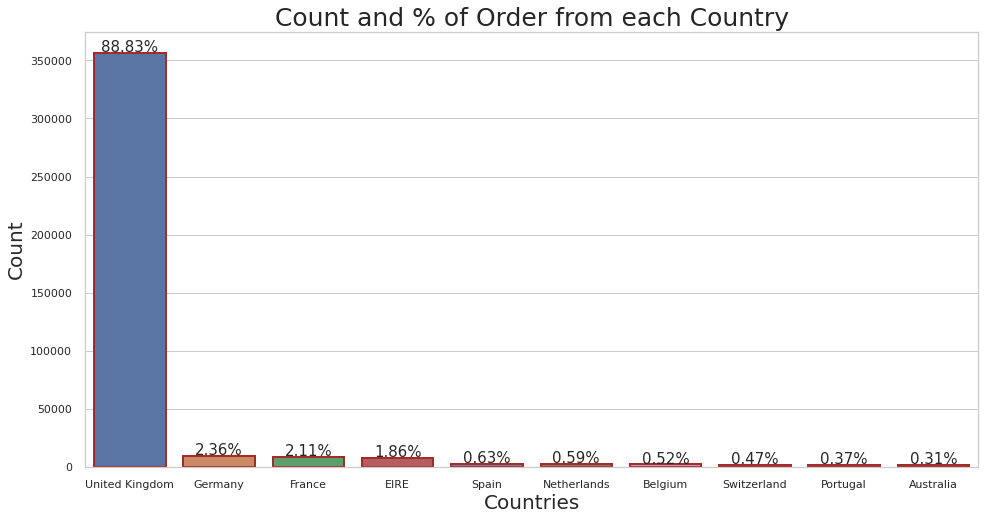

In [38]:
#Visualizing percentage of orders from top 10 countries 
fig, ax = plt.subplots(figsize = (16,8))
splot = sns.barplot(x='Country',y='Total Counts',data = top_countries[:10], edgecolor = 'brown', lw = 2)
plt.title('Count and % of Order from each Country', SIZE = 25)
plt.xlabel('Countries', SIZE = 20)
plt.ylabel('Count', SIZE = 20)
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+1000, '{:1.2f}''%'.format(height/retail_df.shape[0]*100),ha = "center", SIZE = 15)

Text(0.5, 1.0, 'Top 5 countries')

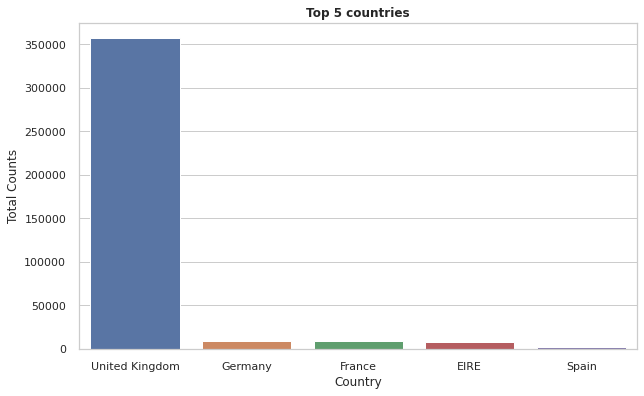

In [39]:
#Top 5 countries
plt.figure(figsize= (10,6))
sns.barplot(x= 'Country', y= 'Total Counts', data= top_countries[:5], palette= 'deep')
plt.title('Top 5 countries', weight= 'bold')

**Findings:**

* 90.83% customers are from United Kingdom.
* 2.41%, 2.16% and 1.90% customers are from Germany, France and Ireland respectively.
* Remain customers belong to other coutries like Spain, Netherlands, Belgium, Switzerland, Portugal, Australia, Bahrain, and Saudi Arabia.

In [40]:
#Most popular products with maximum orders
Top_5_products= retail_df.groupby('Description').count()['CustomerID'].reset_index().sort_values(by= 'CustomerID', ascending= False)
Top_5_products.rename(columns= {'Description':'Products', 'CustomerID': 'frequency'}, inplace= True)
Top_5_products.head()

,Products,frequency
3716,WHITE HANGING HEART T-LIGHT HOLDER,2058
2780,REGENCY CAKESTAND 3 TIER,1894
1771,JUMBO BAG RED RETROSPOT,1659
2355,PARTY BUNTING,1409
217,ASSORTED COLOUR BIRD ORNAMENT,1405


Text(0.5, 1.0, 'Top 5 products')

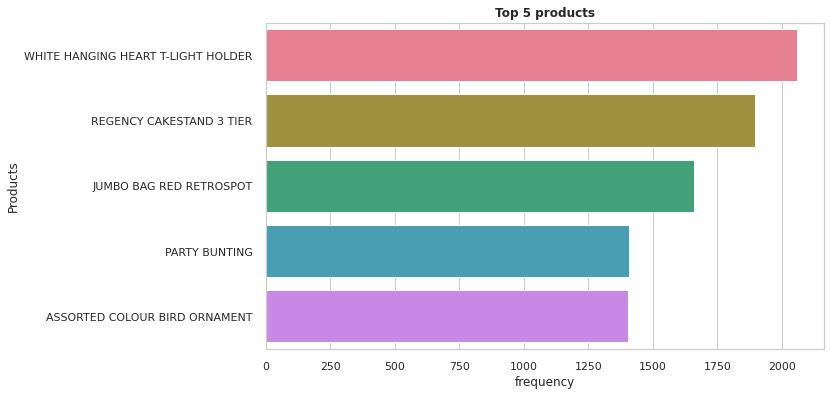

In [41]:
#Visualizing top 5 products
plt.figure(figsize= (10, 6))
sns.barplot(y= 'Products', x= 'frequency', data= Top_5_products.head(), palette= 'husl')
plt.title('Top 5 products', weight= 'bold')

In [42]:
#Visualizing top customers
Top_5_customers= retail_df['CustomerID'].value_counts().reset_index()
Top_5_customers.rename(columns= {'index':'CustomerID', 'CustomerID': 'Count'}, inplace= True)
Top_5_customers.head(5)

,CustomerID,Count
0,17841.0,7812
1,14911.0,5898
2,14096.0,5128
3,12748.0,4459
4,14606.0,2759


In [43]:
#Unique customer in the dataset
retail_df['CustomerID'].nunique()

4372

There are 4339 unique customer for the business.

Text(0.5, 1.0, 'Top 5 customers')

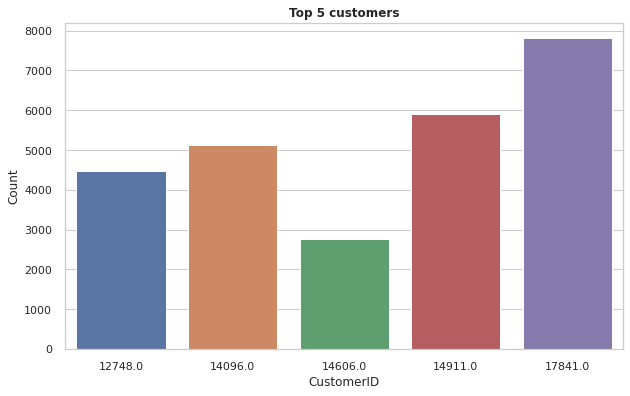

In [44]:
#Visualising top 5 customers
plt.figure(figsize= (10, 6))
sns.barplot( x= 'CustomerID',y= 'Count', data= Top_5_customers.head(5), palette= 'deep')
plt.title('Top 5 customers', weight= 'bold')

**Findings:**

* Top most active customer is 17841 followed by 14911, 14096 and so on.

In [46]:
#Total purchases made from different countries
Revenue_per_country= retail_df.groupby('Country')['total_amount'].sum().reset_index().sort_values(by= 'total_amount', ascending= False)
Revenue_per_country.head()

,Country,total_amount
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050


In [49]:
#Count of orders placed in different years
Total_purchases_years= retail_df['Invoice_year'].value_counts().reset_index()
Total_purchases_years.rename(columns= {'index': 'Year', 'Invoice_year': 'No_of_Orders'}, inplace= True)
Total_purchases_years

,Year,No_of_Orders
0,2011,375250
1,2010,26354


Text(0.5, 1.0, 'Total Orders in Years')

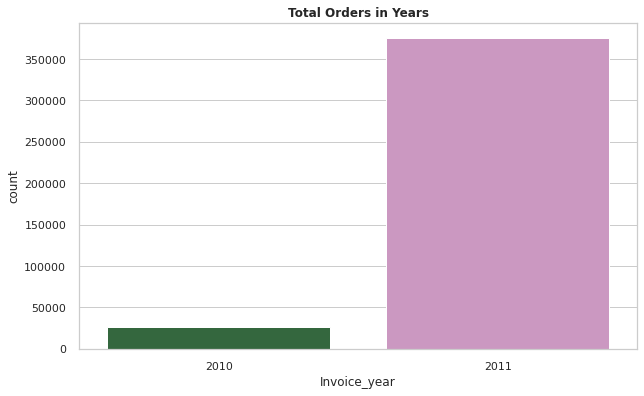

In [50]:
#Visualizing total Orders made in different years
plt.figure(figsize= (10, 6))
sns.countplot(x= 'Invoice_year', data= retail_df, palette= 'cubehelix')
plt.title('Total Orders in Years', weight= 'bold')

From the above chart we can infer that maximum orders were made in the year 2011.

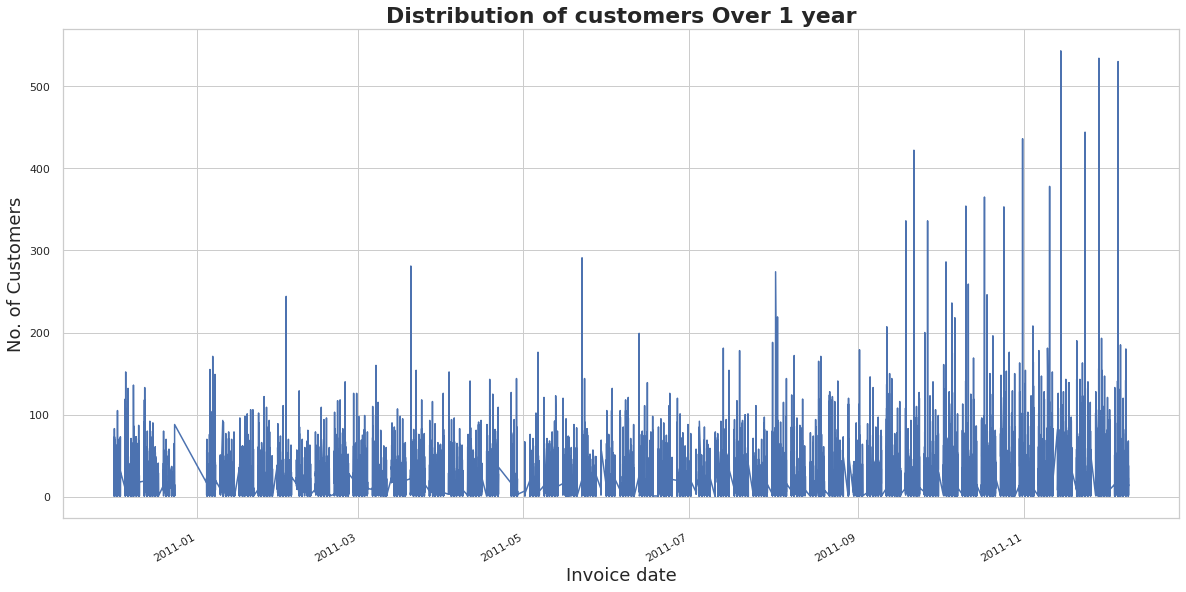

In [51]:
# Purchase distribution in 1 year time period
plt.figure(figsize=(20,10))
customer_distribution = retail_df.groupby('InvoiceDate').count()['CustomerID'].plot()
plt.title('Distribution of customers Over 1 year', size=22, weight= 'bold')
plt.xlabel('Invoice date', size=18)
plt.ylabel('No. of Customers', size=18)
plt.show()

**It can be easily concluded from the above graph that number of customers are increasing as we reaching towards the end of the year 2011.**

**September and November are getting highest purchasing order in comparison to January and March.**

Text(0.5, 1.0, 'CORRELATION MATRIX')

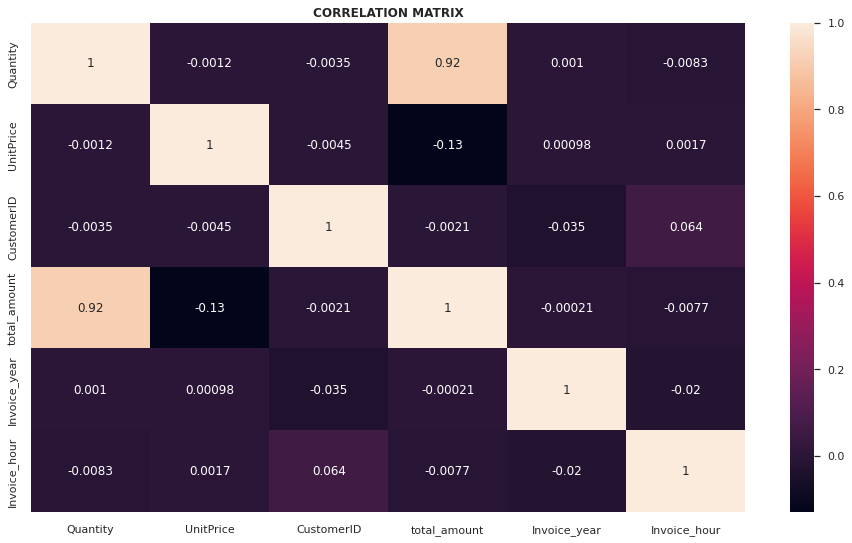

In [52]:
# correlation between various columns
plt.figure(figsize = (16,9))
sns.heatmap(retail_df.corr(), annot = True)
plt.title('CORRELATION MATRIX',weight= 'bold')

---
## **RFM MODEL(Recency, Frequency, Monetary Value)**
### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors.
* Recency: Customers who made purchases recently.
* Frequency: How often a customer makes a purchase.
* Monetary Value: How much money a customer spends on.

#### Performing RFM Segmentation and RFM Analysis, Step by Step 
* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. 
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

---
---


In [54]:
retail_df.shape

(401604, 13)

In [55]:
# Removing cancelled InvoiceNo from the dataset
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [56]:
retail_df.shape

(392732, 13)

After removing the cancelled invoice/orders, we have **392732** observations left in our dataframe.

In [57]:
# creating column for only date
retail_df['Invoice_Date'] = retail_df['InvoiceDate'].dt.date
# Adding 1 day to the Last Invoice date to set as Latest date for reference
snapshot_date = max(retail_df.InvoiceDate) + dt.timedelta(days=1)
# Creating dataframe to record RFM score
RFM_df = retail_df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'total_amount': 'sum'}).reset_index()
# Renaming columns
RFM_df.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'total_amount': 'MonetaryValue'}, inplace=True)

In [58]:
RFM_df

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,721,2045.53


In [96]:
#Shape of RFM DF
RFM_df.shape

(4256, 10)

Text(0.5, 1.0, 'Recency Distribution Plot')

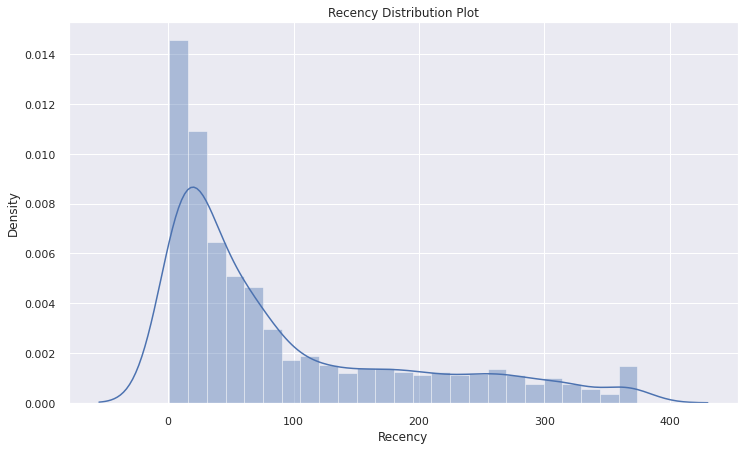

In [60]:
# distribution plot for recency of customers
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.Recency)
plt.title('Recency Distribution Plot')

Text(0.5, 1.0, 'Frequency Distribution Plot')

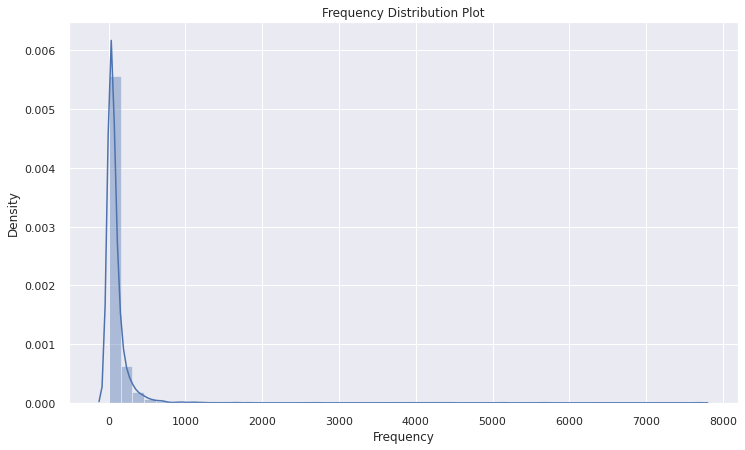

In [61]:
# distplot of Frequency of customers' purchasing
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.Frequency)
plt.title('Frequency Distribution Plot')

Text(0.5, 1.0, 'Monetary Distribution Plot')

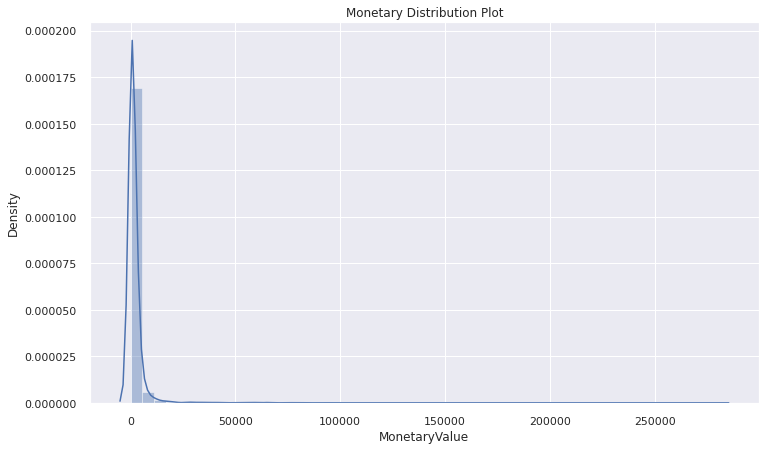

In [62]:
# distplot of Monetary value
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.MonetaryValue)
plt.title('Monetary Distribution Plot')

Text(0.5, 1.0, 'Correlation among RFM')

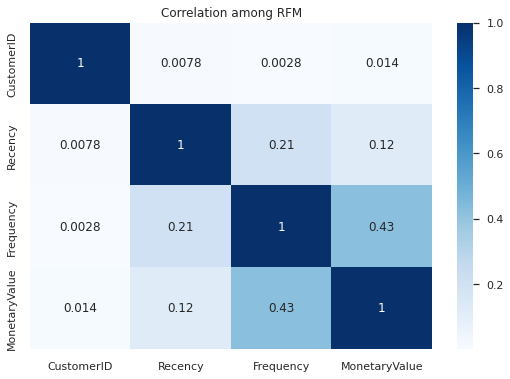

In [63]:
# Correlation mapping between RFM df
rfm_correlation = RFM_df.corr()
# correlation between of Recency, Frequency and MonetaryValue
plt.figure(figsize = (9,6))
sns.heatmap(abs(rfm_correlation), cmap = 'Blues', annot = True)
plt.title('Correlation among RFM')

In [64]:
# Split into four segments using quantiles
quantiles = RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles  

{'CustomerID': {0.25: 13812.5, 0.5: 15299.0, 0.75: 16778.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'MonetaryValue': {0.25: 306.455, 0.5: 668.5600000000001, 0.75: 1660.315},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0}}

In [65]:
# Functions to create R,F and M segments
def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [66]:
# Calculate and addd R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFM_df['R'] = RFM_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFM_df['F'] = RFM_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFM_df['M'] = RFM_df['MonetaryValue'].apply(FnMScoring, args=('MonetaryValue',quantiles,))
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,326,1,77183.60,4,4,1
1,12347.0,2,182,4310.00,1,1,1
2,12348.0,75,31,1797.24,3,3,1
3,12349.0,19,73,1757.55,2,2,1
4,12350.0,310,17,334.40,4,4,3


In [67]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM_df['RFMScore'] = RFM_df[['R', 'F', 'M']].sum(axis = 1)
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
0,12346.0,326,1,77183.60,4,4,1,9
1,12347.0,2,182,4310.00,1,1,1,3
2,12348.0,75,31,1797.24,3,3,1,7
3,12349.0,19,73,1757.55,2,2,1,5
4,12350.0,310,17,334.40,4,4,3,11


In [68]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFM_df['RFMGroup'] = RFM_df.R.map(str) + RFM_df.F.map(str) + RFM_df.M.map(str)
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore,RFMGroup
0,12346.0,326,1,77183.60,4,4,1,9,441
1,12347.0,2,182,4310.00,1,1,1,3,111
2,12348.0,75,31,1797.24,3,3,1,7,331
3,12349.0,19,73,1757.55,2,2,1,5,221
4,12350.0,310,17,334.40,4,4,3,11,443


**Interpretation:**

**RFMScore**: It is the sum of R, F and M value that assigned by quantiles.

**RFMGroup**: This is the combination of R,F, and M values.

For example:

A customer ordered a product 300 days ago, arrived on Online retail platform just once and bought 10$ dollar worth product. According to RFM table he got R = 4(Recency is very low), F = 4(Frequency is very low because he arrived just once) and M = 4(Monetary value is very low). So, the RFMGroup value become 444 means he is the worst customer, we don't need to spend more time on him.

Those customer are the best customers who scored R = 1, F = 1 or 2 and M = 1 or 2 means in combination it will give RFMGroup 111,112,121 values like these are good indications.


### **REMOVING OUTLIERS**
#### For removing outliers we are going to use IQR(Inter Quantile Range)

$$IQR = Q3 - Q1$$

In [69]:
# Outlier treatment
rfm = ['Recency','Frequency','MonetaryValue']
for col in rfm:
  Q1 = RFM_df[col].quantile(0.05)
  Q3 = RFM_df[col].quantile(0.95)
  IQR = Q3 - Q1
  RFM_df = RFM_df [(RFM_df[col] >= Q1 - 1.5*IQR) & (RFM_df[col] <= Q3 + 1.5*IQR)]

In [70]:
# Printing head of RFM table 
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore,RFMGroup
1,12347.0,2,182,4310.00,1,1,1,3,111
2,12348.0,75,31,1797.24,3,3,1,7,331
3,12349.0,19,73,1757.55,2,2,1,5,221
4,12350.0,310,17,334.40,4,4,3,11,443
5,12352.0,36,85,2506.04,2,2,1,5,221


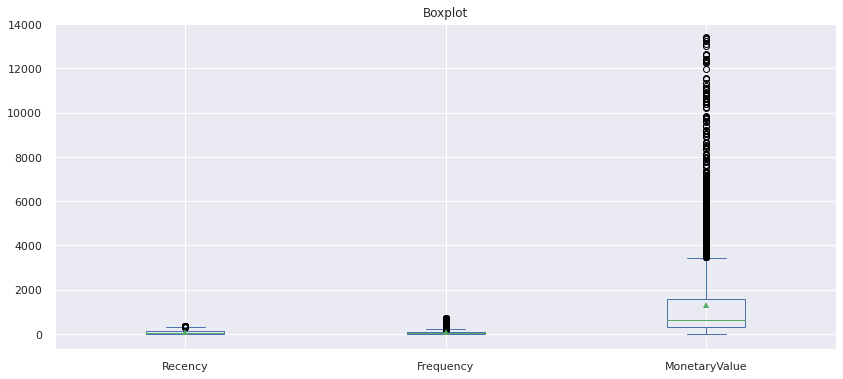

In [71]:
# Checking outliers through Boxplot 
plt.rcParams['figure.figsize']=(14,6)
ax = RFM_df[["Recency","Frequency","MonetaryValue"]].plot(kind='box', title='Boxplot', showmeans=True)
plt.show()

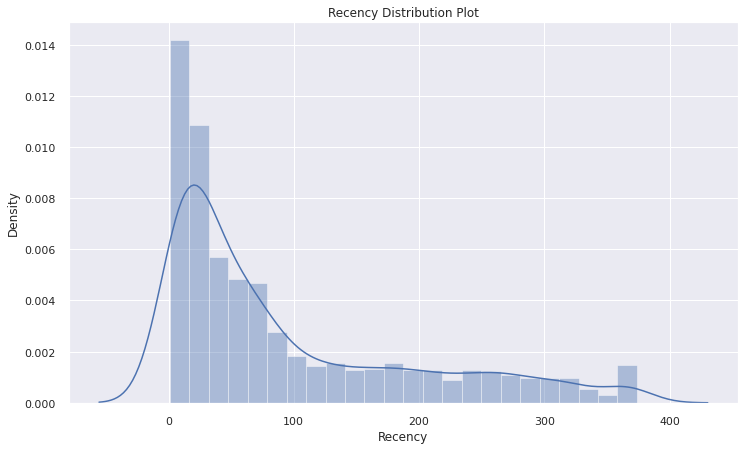

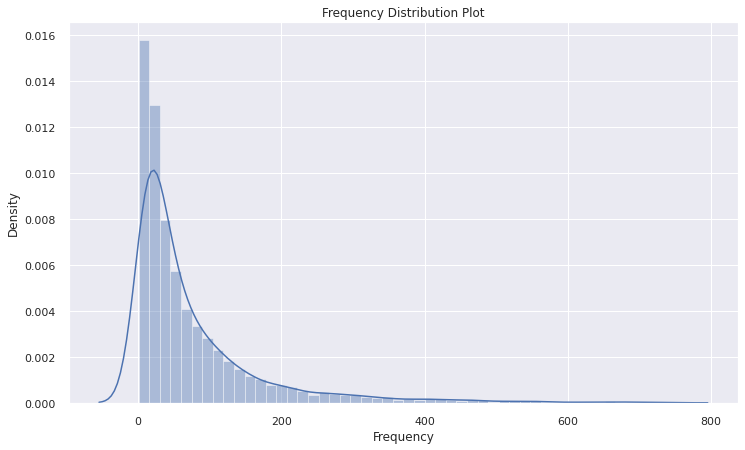

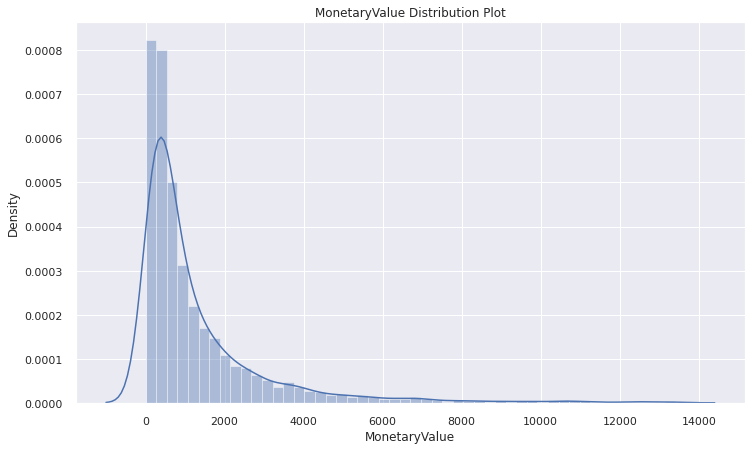

In [72]:
# Now let's check the distribution of Recency , Frequency and MonetaryValue
for col in rfm:
  plt.figure(figsize = (12,7))
  sns.distplot(RFM_df[col])
  plt.title(f'{col} Distribution Plot')

Now, it can be seen we've get rid of the most of outliers in RFM df.

**All the RFM feature distributions are right skewed or positively skewed.**

### Let's check the top customers' list on the basis of RFM Score and RFMGroup value

In [73]:
# Top customers who frequent in all features
print(RFM_df[RFM_df['RFMScore'] == 3].sort_values('RFMScore', ascending = False).reset_index().head(10))
RFM_df[RFM_df['RFMScore'] == 3].shape

   index  CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore  \
0      1     12347.0        2        182        4310.00  1  1  1         3   
1   3240     16764.0        4        700        2790.95  1  1  1         3   
2   2969     16393.0        2        327        3040.96  1  1  1         3   
3   2960     16379.0        4        108        2157.40  1  1  1         3   
4   2944     16360.0        5        636        3450.41  1  1  1         3   
5   2942     16358.0        1        109        2027.50  1  1  1         3   
6   2919     16327.0       14        317        3820.27  1  1  1         3   
7   2918     16326.0        6        300        3039.22  1  1  1         3   
8   2878     16265.0        9        258        5447.00  1  1  1         3   
9   2872     16255.0       17        270        2619.91  1  1  1         3   

  RFMGroup  
0      111  
1      111  
2      111  
3      111  
4      111  
5      111  
6      111  
7      111  
8      111  
9      111 

(386, 9)

### **There are 386 customers who are the best for the our business, so we need to make plans to make them happy because these are the elite ones.**

They scored best in:

* Recency(These are the ones who visit recently)
* Frequency(These are the ones who purchased most frequently)
* Monetary(Comapany make plethora of money)

In [74]:
# Second top customers who frequent in all features
print(RFM_df[(RFM_df['RFMScore'] > 3) & (RFM_df['RFMScore'] <= 5)].sort_values('RFMGroup', ascending = False).reset_index().head(10))
RFM_df[(RFM_df['RFMScore'] > 3) &(RFM_df['RFMScore'] <= 5)].shape

   index  CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore  \
0   2115     15228.0       66        125        3386.71  3  1  1         5   
1   1558     14472.0      104        265        1852.67  3  1  1         5   
2   1634     14565.0       96        127        3099.12  3  1  1         5   
3   1683     14639.0       52        172        2984.49  3  1  1         5   
4    441     12916.0      139        103        2944.95  3  1  1         5   
5   1827     14841.0       53        138        3295.76  3  1  1         5   
6   1829     14844.0       64        130        3189.81  3  1  1         5   
7   1834     14852.0       58        143        2836.69  3  1  1         5   
8   1836     14854.0       78        126        2740.03  3  1  1         5   
9   1891     14930.0      109        127        2362.96  3  1  1         5   

  RFMGroup  
0      311  
1      311  
2      311  
3      311  
4      311  
5      311  
6      311  
7      311  
8      311  
9      311 

(798, 9)

### **There are 798 customers who are the second best customers for the our business, we need some strategy to make them top customers.**

In [75]:
#Preparing Data for modelling
Log_rfm_Data = RFM_df[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log1p, axis = 1)

In [76]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
rfm_features = ['Recency', 'Frequency', 'MonetaryValue']
final_rfm = Log_rfm_Data[rfm_features].values
sc = StandardScaler()                                      #Normalising the RFM data
X = sc.fit_transform(final_rfm)                            

In [77]:
X

array([[-2.10159688,  1.27005606,  1.58552902],
       [ 0.35197725, -0.18263666,  0.83623127],
       [-0.6614514 ,  0.51576308,  0.81710482],
       ...,
       [-1.26761615, -0.9330687 , -1.14070157],
       [-1.71381792,  2.41349813,  0.94706886],
       [-0.06291609,  0.48128566,  0.85510331]])

---
## **MODELING**
---
---

### **IMPLEMENTING K-MEANS**

In [78]:
from sklearn.cluster import KMeans

sns.set(style='whitegrid')
# applying K-means clustering
clusterer = KMeans(n_clusters=3,max_iter=1000, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[1 2 1 ... 2 1 2]


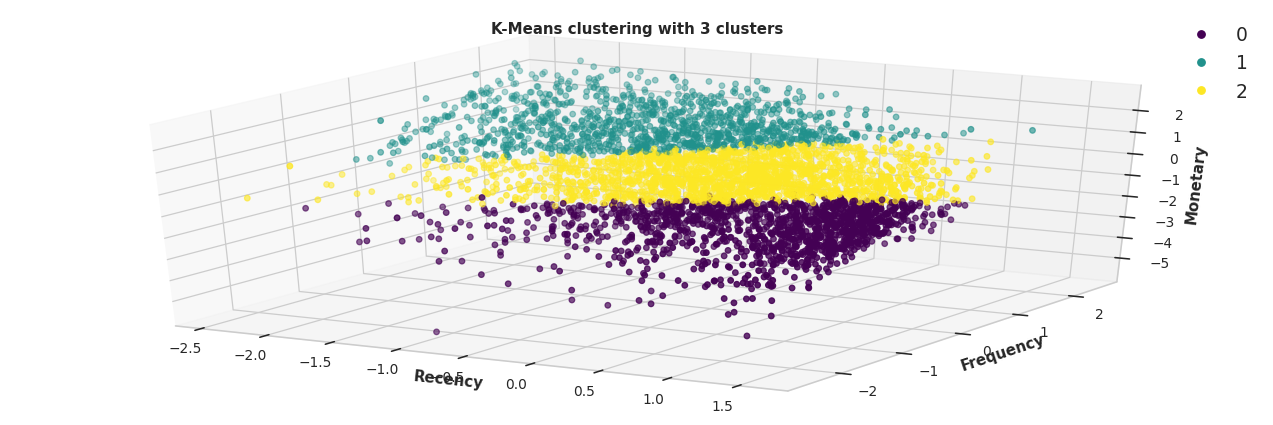

In [79]:
# Plotting Clusters for Visualization
title = 'K-Means clustering with 3 clusters'                        # Setting the title
plt.figure(figsize = (18, 6), dpi=90)                          # Setting the size of the figure
ax = plt.axes(projection ="3d")                                     # initializing axes
ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
ax.set_title(title, fontweight ='bold')                             # Setting main title
ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=cluster_labels, cmap='viridis')     # Plotting scatter plot in 3 dimensions
plt.legend(*ax.legend_elements(),prop={'size': 15})  

In [81]:
# assign the label
RFM_df['Cluster_Id_3'] =cluster_labels[0:4256]
print(RFM_df.head())

   CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore RFMGroup  \
1     12347.0        2        182        4310.00  1  1  1         3      111   
2     12348.0       75         31        1797.24  3  3  1         7      331   
3     12349.0       19         73        1757.55  2  2  1         5      221   
4     12350.0      310         17         334.40  4  4  3        11      443   
5     12352.0       36         85        2506.04  2  2  1         5      221   

   Cluster_Id_3  
1             1  
2             2  
3             1  
4             0  
5             1  


In [82]:
# grouping clusters on the basis of their cluster label
RFM_df.groupby('Cluster_Id_3').mean()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
Cluster_Id_3,,,,,,,,
0,15397.274524,178.179958,14.304869,278.155569,3.393084,3.669725,3.615385,10.678193
1,15188.360210,20.065732,184.186678,3196.024075,1.448729,1.313760,1.298861,4.061350
2,15304.880448,73.392226,53.925206,896.058524,2.485866,2.415783,2.449941,7.351590


According to the above table we can conclude that:
* Cluster 0 comprises that these are the group of customers of whom Recency is very high, frequencies are very less and Company is generating only few bucks.
* Cluster 1 comprises information that these are the customers who visits more, they are more frequent and they are helping to generate a lot of business.
* Cluster 2 comprises the insights that these are the customers who are marked with less frequency but more frequent than cluster 0 and company is making more money than cluster 0.

**Among these three clusters we need to give more attention on the customers who belong to Cluster_Id 1.**

In [83]:
# Number of customers belonging to each cluster
RFM_df['Cluster_Id_3'].value_counts()

2    1698
0    1417
1    1141
Name: Cluster_Id_3, dtype: int64

---
### **Implementing K-means clustering with Silhouette.**
---
---
### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$

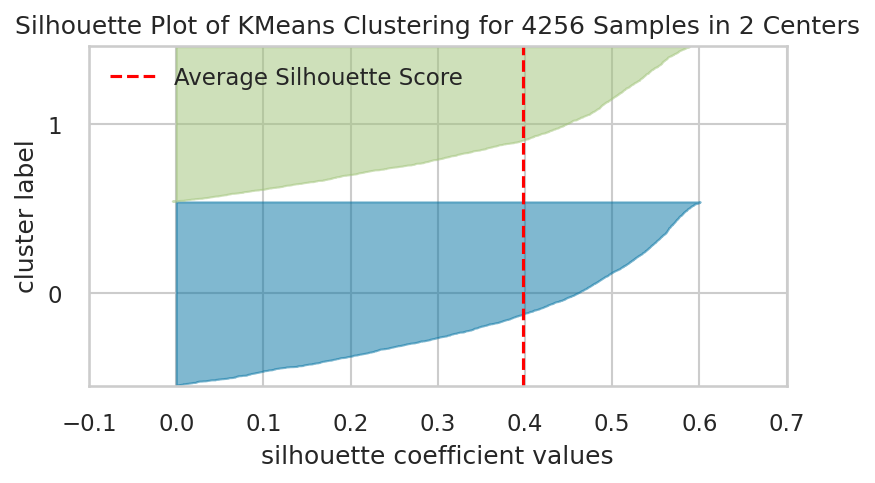

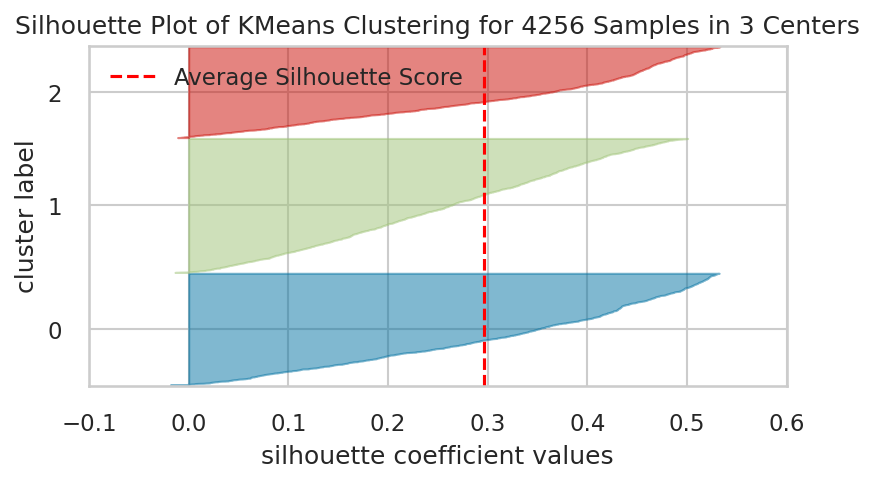

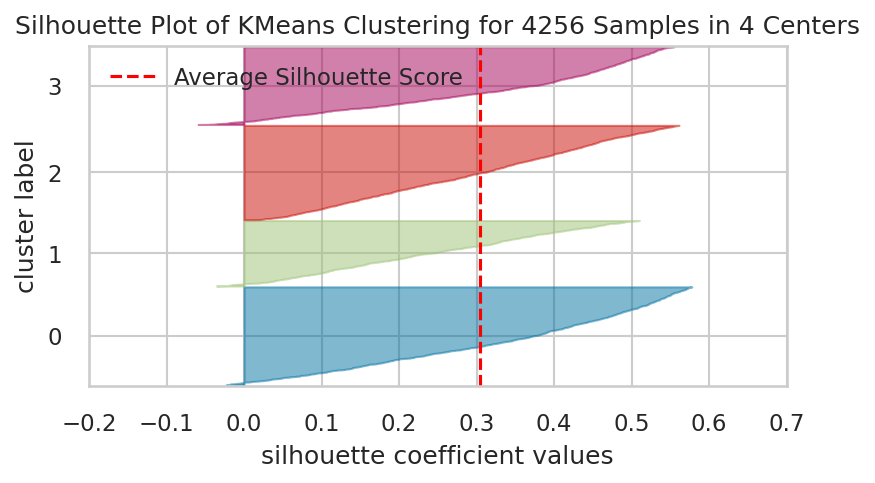

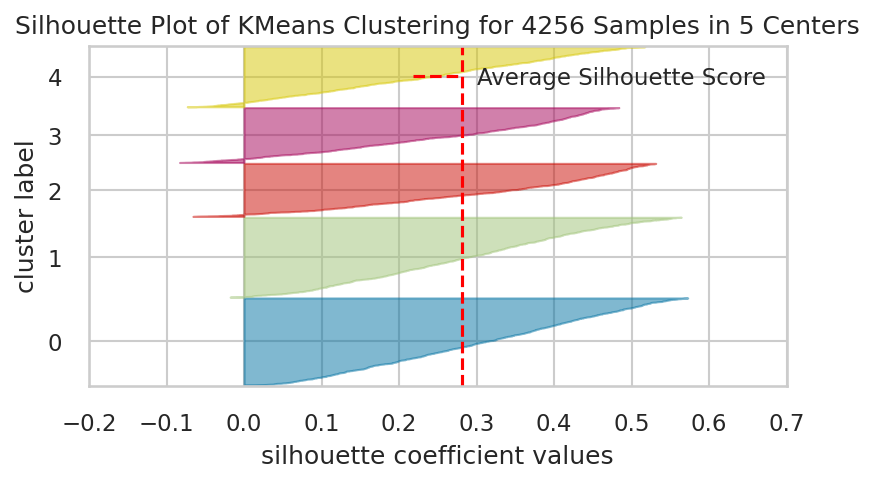

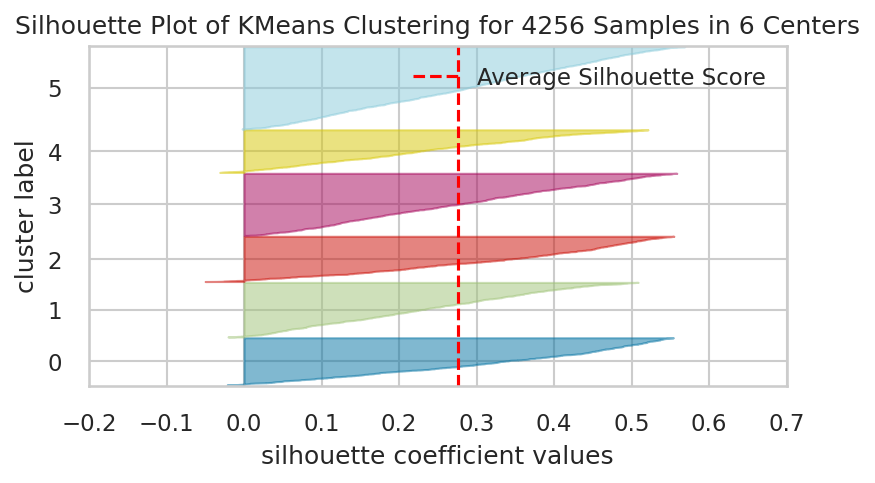

In [84]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (6, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

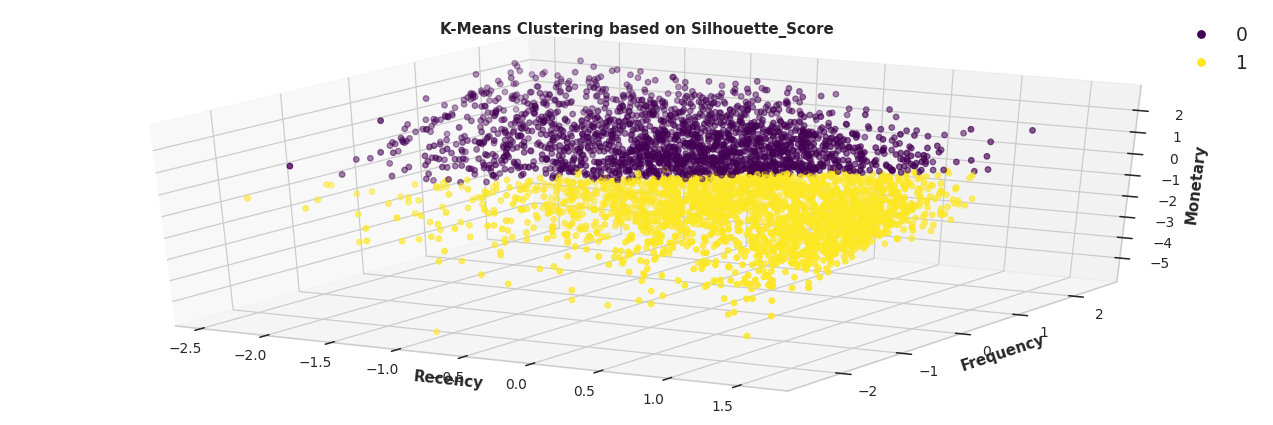

In [85]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_  
sns.set(style='whitegrid')

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
ax = plt.axes(projection ="3d")                                     # initializing axes
ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
ax.set_title(title, fontweight ='bold')                             # Setting main title
ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
plt.legend(*ax.legend_elements(),prop={'size': 15})  

**Silhouette Score is around 0.40 having n_clusters = 2 which means neighbouring clusters are away from each other, there are less chance for assigning the customers into wrong clusters.**

---
### **Implementing K-means with Elbow Method**
---
---

In [86]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()

In [87]:
# Using the elbow method to find out optimum number of clusters, with different metrics
def elbow_method(X):
  ''' Displays elbow curves with different metrics '''
  
  metrics = ['distortion', 'calinski_harabasz', 'silhouette']
  
  for m in metrics:
    visualizer = KElbowVisualizer(kmeans, k = (2,10), metric = m)
    visualizer.fit(X)
    visualizer.poof()

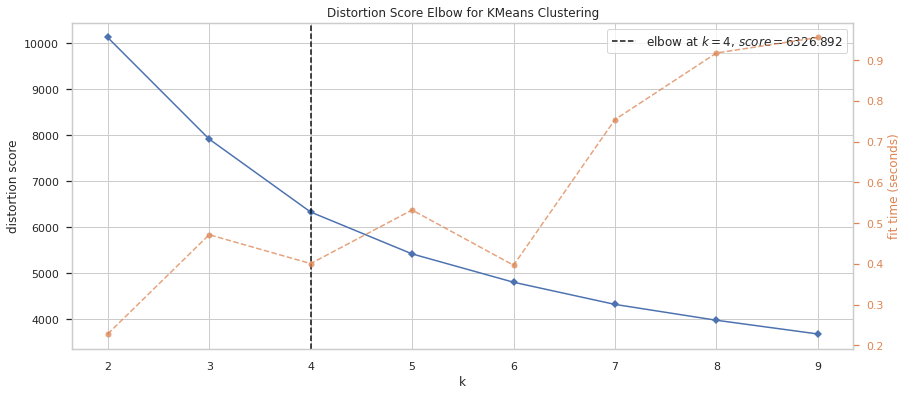

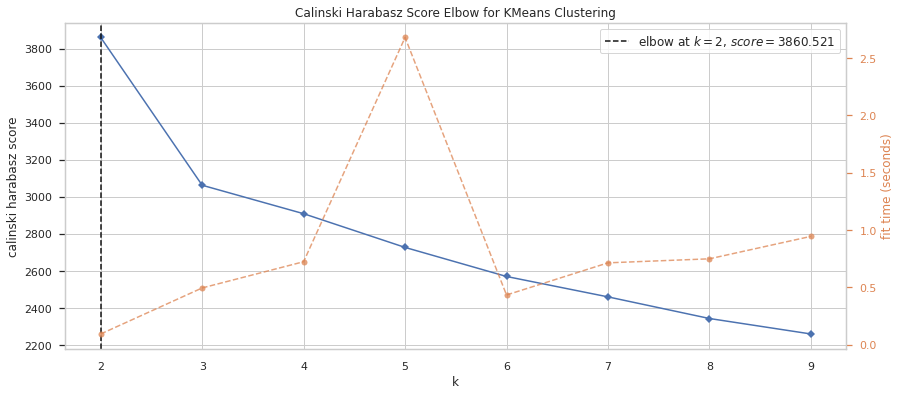

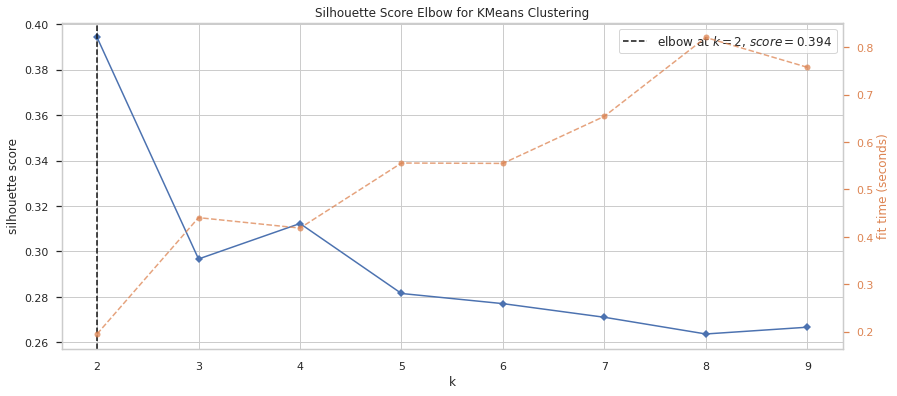

In [88]:
# Using the elbow method function to understand optimum number of clusters
elbow_method(Log_rfm_Data)

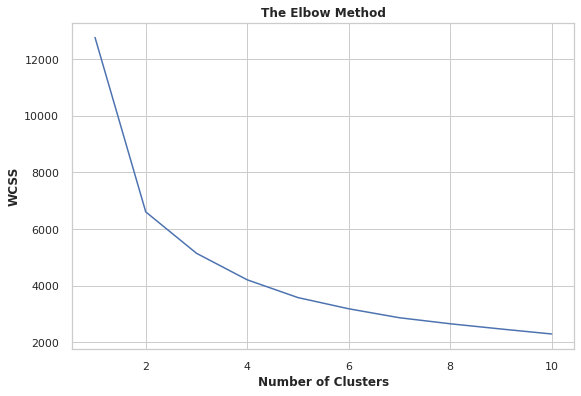

In [89]:
# within cluster sum of squares
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plotting Elbow plot to identify the better clusters

plt.figure(figsize = (9,6))
plt.grid(True)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontweight = 'bold')
plt.xlabel('Number of Clusters',fontweight = 'bold')
plt.ylabel('WCSS', fontweight = 'bold')
plt.show()

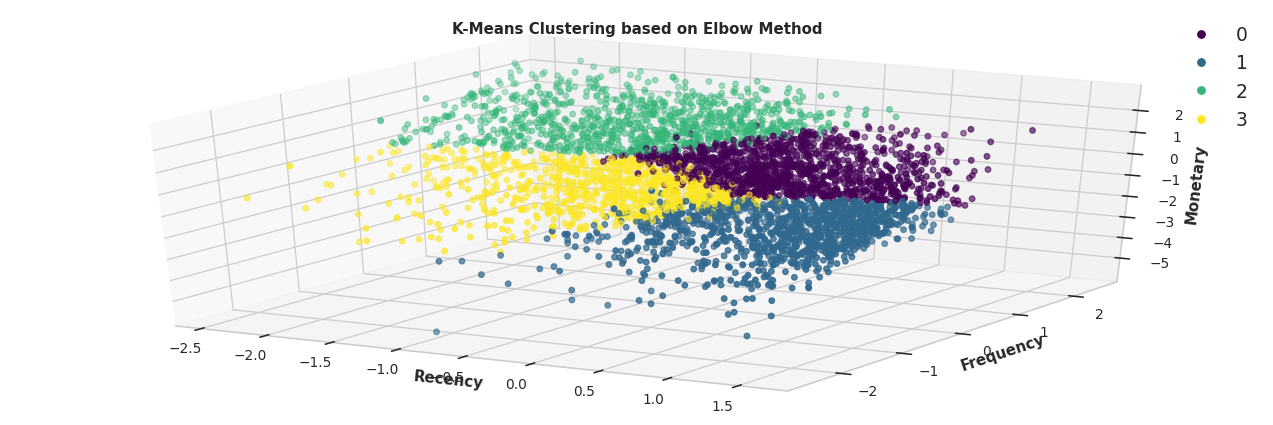

In [90]:
# Fitting the model on n_clusters = 4 based on Elbow Method to visualise the segments.
kmc = KMeans(n_clusters=4,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_  

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow Method'  # Setting the title
segment_name = 'K-Means|2Cluster'
plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
ax = plt.axes(projection ="3d")                                     # initializing axes
ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
ax.set_title(title, fontweight ='bold')                             # Setting main title
ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
plt.legend(*ax.legend_elements(),prop={'size': 15})  

**In order to choose a better cluster we need to choose the number of cluster which has minimum WCSS.** 

**As it can be seen in above Elbow Method 4 seems to be the better cluster which has lower WCSS.**

**If we go further then there is very slight downfall in WCSS so, 4 seems to be a good no of cluster.** 

---
### **Implementing Hierarchical Clustering**
---
---

In [91]:
# importing figsize parameters
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

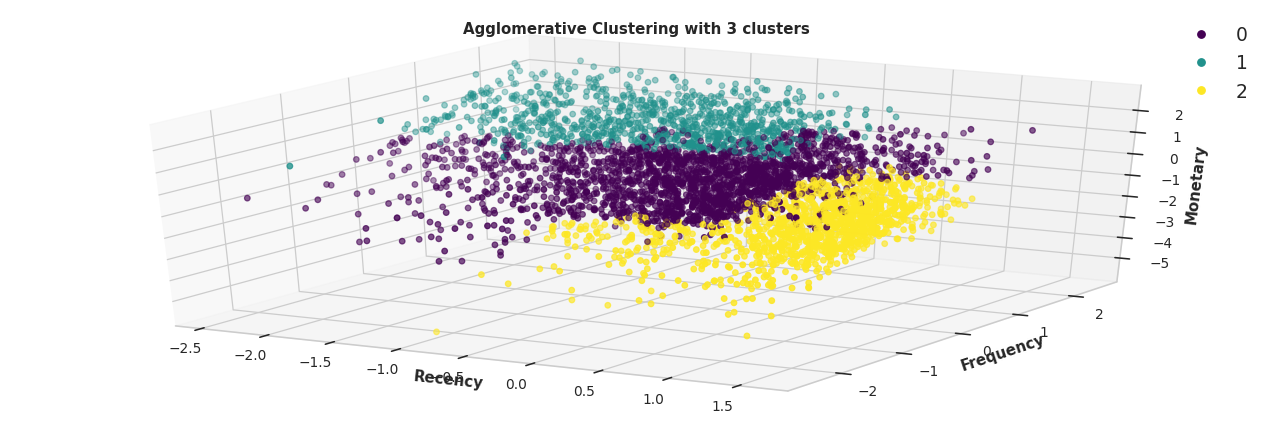

In [92]:
# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering with 3 clusters'                                     # Setting the title
segment_name = 'hierarchical|3Cluster'
overlap_supress = 0.2
plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
ax = plt.axes(projection ="3d")                                     # initializing axes
ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
ax.set_title(title, fontweight ='bold')                             # Setting main title
ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y_hc, cmap='viridis')     # Plotting scatter plot in 3 dimensions
plt.legend(*ax.legend_elements(),prop={'size': 15})  

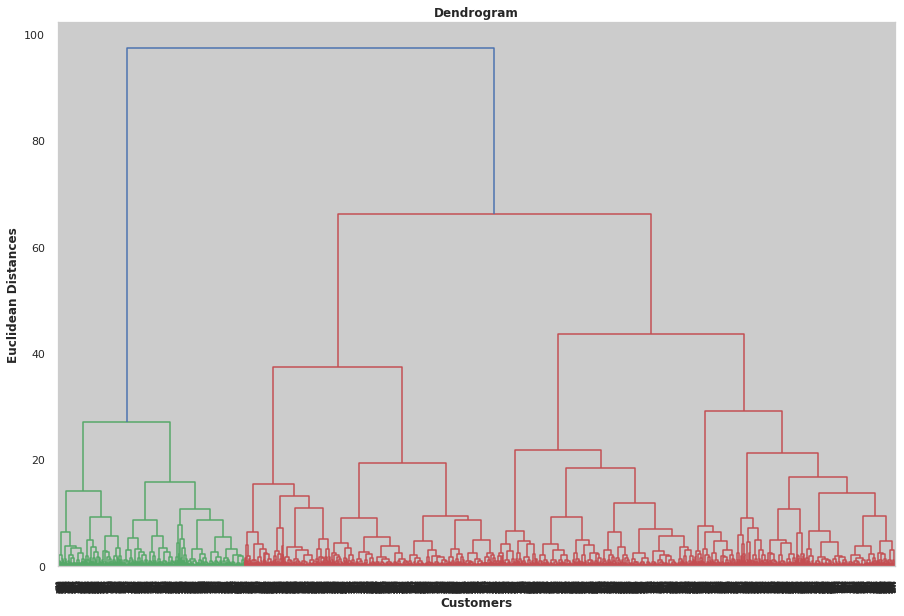

In [93]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontweight = 'bold')
plt.xlabel('Customers',fontweight = 'bold')
plt.ylabel('Euclidean Distances',fontweight = 'bold')
plt.show()

The more we climb the tree, the more the classes are grouped together and the less they are homogeneous (less intra-class inertia).
The number of classes is a compromise between the similarity in the classes and the dissimilarity between the classes.

**Cutting Dendrogram at the Threshold Value**

Now, let’s cut the dendrogram by a threshold value. We have chosen a cut-off or threshold value of 50. At this value, a vertical line can also be drawn. 
For a chosen cut-off/threshold value, we can always simply count the number of intersections with vertical lines of the dendrogram to get the number of formed clusters.

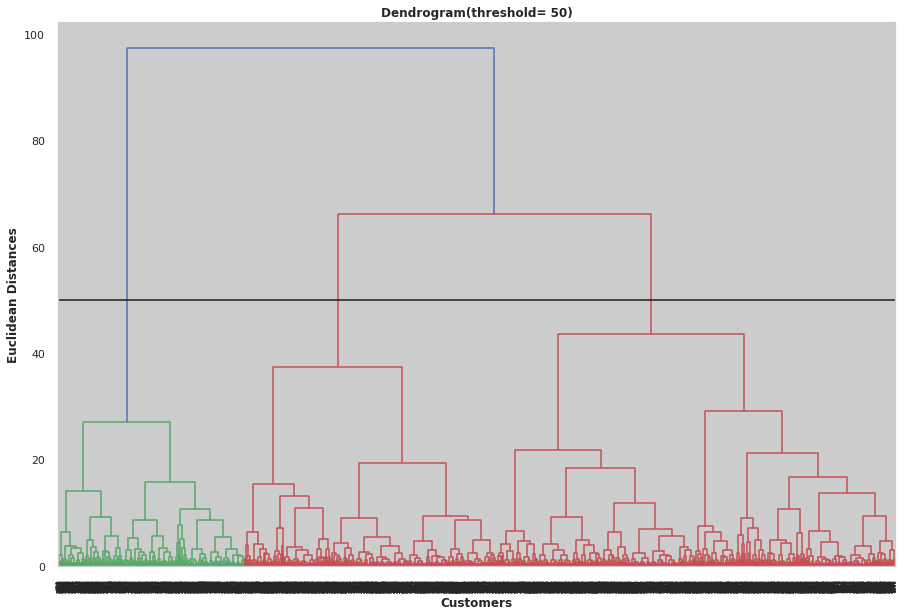

In [94]:
# Creating Dendrogram for our data
max_d = 50
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Cutting the dendrogram at max_d
plt.axhline(y = max_d,c = 'k')
plt.title('Dendrogram(threshold= 50)',fontweight = 'bold')
plt.xlabel('Customers',fontweight = 'bold')
plt.ylabel('Euclidean Distances',fontweight = 'bold')
plt.show()

**As it can be seen in above Dendogram, Say we choose a cut-off of max_d = 50, we’d get 3 final clusters. Similarly if we choose another cut-off like max_d = 40 Then we'd get 4 final clusters.**

##**Summary**

In [95]:
#Importing PreetyTable library
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
my_pretty_table = PrettyTable(['Sr. No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
my_pretty_table.add_row(['1','K-Means','RFM',"3"])
my_pretty_table.add_row(['2',"K-Means with silhouette_score ", "RFM", "2"]) 
my_pretty_table.add_row(['3',"K-Means with Elbow method  ", "RFM", "4"])
my_pretty_table.add_row(['4',"Hierarchical clustering  ", "RFM", "2"])
my_pretty_table.add_row(['5',"Hierarchical clustering after Cut-off ", "RFM", "3"])
print(my_pretty_table)

+---------+----------------------------------------+------+---------------------------+
| Sr. No. |               Model_Name               | Data | Optimal_Number_of_cluster |
+---------+----------------------------------------+------+---------------------------+
|    1    |                K-Means                 | RFM  |             3             |
|    2    |     K-Means with silhouette_score      | RFM  |             2             |
|    3    |      K-Means with Elbow method         | RFM  |             4             |
|    4    |       Hierarchical clustering          | RFM  |             2             |
|    5    | Hierarchical clustering after Cut-off  | RFM  |             3             |
+---------+----------------------------------------+------+---------------------------+


##**Analysis Summary**

* **Top Customer IDs:** 17841.0, 14911.0, 14096.0, 12748.0, 14606.0
* Which Year produced maximum business: 2011
* **Maximum purchasing on different days:** Thursday > Wednesday > Tuesday > Monday > Sunday > Friday. No Purchases were made on Saturday.
* **Top Five Countries:** United Kingdom(88.83%), Germany(2.36%), France(2.11%), Ireland(1.86%) and Spain(0.63%).
* **Month which give maximum business:** November, October, December, September and May.
* Most of the customers usually purchase products in between 10:00 A.M to 3:00 P.M.

Top Five products purchasing on the basis of frequency(How frequent customers are willing to bought these products): 

* WHITE HANGING HEART T-LIGHT HOLDER
* REGENCY CAKE STAND 3 TIER
* JUMBO BAG RED RETROSPOT
* PARTY BUNTING
* ASSORTED COLOUR BIRD ORNAMENT


##**Conclusion**

* RFM(Recency, Frequency and Monetary) dataframe ease our problem to solve in a particular order, it makes easy to recommend and display new launched products to few customers.
* Applied different clustering algorithms:
 * **K-Means** = Optimal Clusters(**3**)
 * **K-Means with Silhoutte** = Optimal_Clusters: (**2**)
 * **K-Means with Elbow Method** = Optimal_Clusters: (**4**)
 * **Hierarchical Clustering** = Optimal_Clusters: (**2**)
 * **Hierarchical Clustering with cut-off** = Optimal_Cluster: (**3**)